# B2S3 Data Wrangling: Limpieza y transformación, unión y cambio de forma


## T1 Limpieza y transformación
* Quitar duplicados
* Transformación usando una función o mapeo
* Reemplazo de valores
* Renombrar los índices de los ejes
* Discretización y agrupamiento
* Detección y filtrado de valores perdidos
* Cálculo de variables indicadoras (dummy)
* Manipulación de cadenas


### Quitar duplicados

In [1]:
import pandas as pd

In [4]:
data = pd.DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})

In [5]:
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


El método *duplicated* para DataFrame devuelve una serie booleana que indica si cada 
renglón es un duplicado o no


In [4]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [5]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


### Transformación usando una función o mapeo

In [6]:
data = pd.DataFrame({'comida': ['tocino', 'cerdo desmenuzado', 'tocino', 'pastrami',
                           'carne en conserva', 'Tocino', 'pastrami', 'jamón de miel',
                           'nova lox'],
                  'onzas': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [7]:
data

,comida,onzas
0,tocino,4.0
1,cerdo desmenuzado,3.0
2,tocino,12.0
3,pastrami,6.0
4,carne en conserva,7.5
5,Tocino,8.0
6,pastrami,3.0
7,jamón de miel,5.0
8,nova lox,6.0


Suponga que se desea agregar una columna que indique el tipo de animal del
cual viene cada comida. Escribamo un mapeop ara cada diferente tipo de carne para
el tipo de animal

In [8]:
meat_to_animal = {
'tocino': 'cerdo',
'cerdo desmenuzado': 'cerdo',
'pastrami': 'vaca',
'carne en conserva': 'vaca',
'jamón de miel': 'cerdo',
'nova lox': 'salmon'
}

In [9]:
meat_to_animal

{'tocino': 'cerdo',
 'cerdo desmenuzado': 'cerdo',
 'pastrami': 'vaca',
 'carne en conserva': 'vaca',
 'jamón de miel': 'cerdo',
 'nova lox': 'salmon'}

El método map sobre una Serie acepta una función o un objeto tipo diccionario que contenga un mapeo. pero aquí tenemos un pequeño problema, debido a que algunas comidas tienen mayúsculas y otras no. Entonces, también debemos cnvertir cada valor a minúscula.

In [10]:
data['animal'] = data['comida'].map(str.lower).map(meat_to_animal)

In [11]:
data

,comida,onzas,animal
0,tocino,4.0,cerdo
1,cerdo desmenuzado,3.0,cerdo
2,tocino,12.0,cerdo
3,pastrami,6.0,vaca
4,carne en conserva,7.5,vaca
5,Tocino,8.0,cerdo
6,pastrami,3.0,vaca
7,jamón de miel,5.0,cerdo
8,nova lox,6.0,salmon


También pudimos haber pasado una función que hiciera todo el trabajo:

In [12]:
data['comida'].map(lambda x: meat_to_animal[x.lower()])

0     cerdo
1     cerdo
2     cerdo
3      vaca
4      vaca
5     cerdo
6      vaca
7     cerdo
8    salmon
Name: comida, dtype: object

### Reemplazo de valores

In [13]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])

In [14]:
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

Los valores -999 podrían ser valores "centinela" para datos faltantes. Para reemplazar estos con valores NA que pandas entienda,
podemos usar *replace* produciendo una nueve Series:

In [15]:
import numpy as np
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

Si queremos reemplazar más de un valor, podemos hacer lo siguiente:

In [16]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

También se puede usar un diferente valor para cada sustitución:

In [18]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

O, usando como argumento un diccionario:

In [19]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

# Renombrado de ejes e índices

In [11]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Ohio', 'Colorado', 'New York'],
                 columns=['one', 'two', 'three', 'four'])

In [12]:
import numpy as np

In [13]:
np.arange(12).reshape((3,4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [14]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


Igual que las Series, los índices de eje tienen un método *map*

In [15]:
data.index.map(str.upper)

Index(['OHIO', 'COLORADO', 'NEW YORK'], dtype='object')

Se puede asignar un índice, modificando la tabla DataFrame:

In [23]:
data.index = data.index.map(str.upper)
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


Si quiere crear una versión transformada de un DataFrame sin modificar el original, un método útil es rename:

In [26]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [27]:
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


El método rename se puede usar junto con un objeto tipo diccionario dando nuevos valore spara un subconjunto de nombres de los ejes:

In [28]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


*rename* guarda una copia del DataFrame manualmente y asigna sus atributos de índice y columnas. Si quieres modficiar el DataFrame y sustituir se usaría *inplace=True*

In [29]:
# Siempre regresa una referencia a un DataFrame
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)

In [30]:
data

,one,two,three,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


### Discretización y agrupación

Los datos contnuos se pueden discretizar o separarse en *clases* para el análisis. Suponga que tenemos datos de un grupo de personas en un estudi y que quiere agruparlos en clases discretas:

In [16]:
edades = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [20]:
edades[3]

27

Dividamos estas edades en clases de 18 a 25, 26 a 35, 36 a 60 y, finalmente, 60 y mayores. Para hacer eso, se usará la función *cut* de pandas:

In [21]:
clases = [0, 18, 25, 35, 60, 100]
cats = pd.cut(edades, clases)
cats
#The object pandas returns is a special Categorical object. You can treat it like an array
#of strings indicating the bin name; internally it contains a levels array indicating the
#distinct category names along with a labeling for the ages data in the labels attribute:


[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (5, interval[int64]): [(0, 18] < (18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [22]:
pd.value_counts(cats)

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
(0, 18]      0
dtype: int64

De acuerdo con la notación matemática por intervalos, un paréntesis significa que el lado es abierto mientras que el paréntesis cuadrado significa que es cerrado (incluyente). De qué lado es cerrado se puede cambiar pasando el argumento right=False

In [23]:
pd.cut(edades, [0, 18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

También se pueden pasar los nombres de las categorías con una lista o arreglo con la opción de categorías:

In [25]:
etiqueta_grupos = ['Niños','Joven', 'AdultoJoven', 'EdadMedia', 'Mayor']
pd.cut(edades, clases, labels=etiqueta_grupos)

['Joven', 'Joven', 'Joven', 'AdultoJoven', 'Joven', ..., 'AdultoJoven', 'Mayor', 'EdadMedia', 'EdadMedia', 'AdultoJoven']
Length: 12
Categories (5, object): ['Niños' < 'Joven' < 'AdultoJoven' < 'EdadMedia' < 'Mayor']

### Cálculo de variables indicadoras/dummy

Otro tipo de transformación muy común en la modelación estadística o en aplicaciones de machine learning es convertir una variable categórica en una matriz dummy o de variables indicadoras. Si una columna en un DataFrame tiene k columnas que contienen todas 1 o 0, pandas tiene una función get_dummies para hacer esto.

In [28]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b']})


In [29]:
df

,key
0,b
1,b
2,a
3,c
4,a
5,b


In [30]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


En algunos casos, podrías querer agregar un prefijo en las columnas en el DataFrame, el cual puede ser unido (merge) con los otros datos, get_dummies tiene un argumento de prefijo para hacer esto:

In [31]:
dummies = pd.get_dummies(df['key'], prefix='key')


In [32]:
df_with_dummy = df[['key']].join(dummies)


In [33]:
df_with_dummy

,key,key_a,key_b,key_c
0,b,0,1,0
1,b,0,1,0
2,a,1,0,0
3,c,0,0,1
4,a,1,0,0
5,b,0,1,0


### T2 Unión

La operación de unir (join o merge) combina las tablas de datos unimendo renglones usando una o más llaves. Estas operaciones son fundamentales en las bases de datos relacionales. La función merge en pandas es una entrada principal para estos algoritmos en los datos.

In [34]:
#Ejemplo
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                 'data2': range(3)})

In [44]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [45]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


Este es un ejemplo de unión de muchos-a-muchos, los datos en df1 tienen múltiples renglones cuyas etiquetas son a y b, mientras que en df2 solo hay un renglon para cada valor en la columna de key. Usando merge obtenemos:

In [46]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


Note que no especificamos cuál columna hace la unión. Si no se especifica, merege usa la columna cuyo nombre comparten, como es el caso de key. Es una buena práctica especificarla explícitamente:

In [47]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


Si los nombres de las columnas son diferentes, pueden especificarse por separado:

In [48]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})

In [49]:
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                 'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [50]:
#Many-to-many merges have well-defined though not necessarily intuitive behavior.
#Here’s an example:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                 'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                 'data2': range(5)})


In [51]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [52]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [53]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [54]:
#Many-to-many joins form the Cartesian product of the rows. Since there were 3 'b'
#rows in the left DataFrame and 2 in the right one, there are 6 'b' rows in the result.
#The join method only affects the distinct key values appearing in the result:
pd.merge(df1, df2, how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [2]:
pd.concat([df1,df2])

NameError: name 'pd' is not defined

# Opciones de Merge
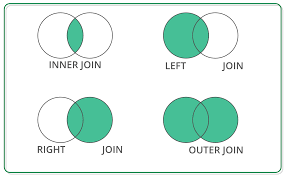

### T3 Cambio de forma

In [55]:
import numpy as np
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                 index=pd.Index(['Ohio', 'Colorado'], name='state'),
                 columns=pd.Index(['one', 'two', 'three'], name='number'))

In [56]:
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [57]:
result = data.stack()

In [58]:
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [59]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


Por default, el nivel es desaplilado( unstacked) (lo mismo con stack). Puede hacer unstack con un diferente nivel pasando un número o nombre:

In [60]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [61]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


El proceso de desapilado puede introducir datos faltantes en todos los valores en los niveles que no sean encontrados en cada uno de los subgrupos:

In [62]:
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])

In [63]:
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [64]:
#Stacking filters out missing data by default, so the operation is easily invertible:
data2.unstack().stack() 

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [65]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

#### Pivot

In [66]:
#https://pandas.pydata.org/docs/user_guide/reshaping.html

In [67]:
#Datos de ejemplo

df=pd.DataFrame({'foo':['one'] * 3 + ['two'] * 3,
                 'bar':['A','B','C'] * 2,
                'baz':[1,2,3,4,5,6],
                'zoo':['x','y','z','q','w','t']})

In [68]:
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [69]:
df.pivot(index='foo',
        columns='bar',
        values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [70]:
df.pivot(index='foo',
        columns='bar',
        values='zoo')

bar,A,B,C
foo,,,
one,x,y,z
two,q,w,t


In [71]:
#Creación del dataframe del ejemplo

import pandas._testing as tm
import numpy as np

def unpivot(frame):
    N, K = frame.shape
    data = {
        "value": frame.to_numpy().ravel("F"),
        "variable": np.asarray(frame.columns).repeat(N),
        "date": np.tile(np.asarray(frame.index), K),
    }
    return pd.DataFrame(data, columns=["date", "variable", "value"])


df = unpivot(tm.makeTimeDataFrame(3))

In [72]:
df

,date,variable,value
0,2000-01-03,A,-1.246191
1,2000-01-04,A,0.898276
2,2000-01-05,A,0.582790
3,2000-01-03,B,-0.636212
4,2000-01-04,B,-0.247471
5,2000-01-05,B,0.624700
6,2000-01-03,C,-0.980549
7,2000-01-04,C,0.970968
8,2000-01-05,C,0.245869
9,2000-01-03,D,0.184232


In [73]:
df.pivot(index="date", columns="variable", values="value")

variable,A,B,C,D
date,,,,
2000-01-03,-1.246191,-0.636212,-0.980549,0.184232
2000-01-04,0.898276,-0.247471,0.970968,-1.336192
2000-01-05,0.582790,0.624700,0.245869,0.619177


In [74]:
#Ojo, esto solo funciona cuando no tenemos valores repetidos para tablas con valores repetidos 
#se usa pivot_table que es una generalización de esta función

In [75]:
df["value2"] = df["value"] * 2

In [76]:
pivoted = df.pivot(index="date", columns="variable")

In [77]:
pivoted

value                                  value2            \
variable           A         B         C         D         A         B   
date                                                                     
2000-01-03 -1.246191 -0.636212 -0.980549  0.184232 -2.492383 -1.272423   
2000-01-04  0.898276 -0.247471  0.970968 -1.336192  1.796553 -0.494942   
2000-01-05  0.582790  0.624700  0.245869  0.619177  1.165579  1.249400   

                                
variable           C         D  
date                            
2000-01-03 -1.961097  0.368464  
2000-01-04  1.941936 -2.672383  
2000-01-05  0.491738  1.238353